In [2]:

import math
import torch
import numpy as np
# import gpytorch
import pandas as pd
import seaborn as sns
import os
import pickle
import shutil

import sklearn
from sklearn.model_selection import KFold

import imblearn as imb
# print("imblearn version: ",imblearn.__version__)
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import itertools

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score

from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from rdkit import Chem
from rdkit.Chem import Draw
import sys
sys.path.append('../')
import utils
from sklearn.model_selection import GridSearchCV
from VisUtils import *
from RF_GSCV import *
from sklearn.model_selection import KFold
from split_data import *
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
def scale_data(train_x_df, train_y_df, test_x_df, test_y_df): 
    x_df = pd.concat([train_x_df, test_x_df])
    scaling=StandardScaler()
    scaling.fit(x_df)
    Scaled_data=scaling.transform(x_df)
    train_x = scaling.transform(train_x_df)
    test_x = scaling.transform(test_x_df) 
    
    train_y = train_y_df.to_numpy().flatten()
    test_y = test_y_df.to_numpy().flatten()
    return train_x, train_y, test_x, test_y
    

# Split data 

Take in MOE descriptor dataset from rdkit smiles strings, split majority and minority and add assign folds to make balanced across folds 

In [4]:
data_path = '../../../data/datasets/'


# this is rdkit smiles strings, pct binding, target NEK, compound id, active yes/no


# nek2bind_1uM_50pct = 'NEK2_1_uM_min_50_pct_binding.csv'
# bind_1uM50pct = pd.read_csv(data_path+nek2bind_1uM_50pct)

In [5]:
# data_path_feat = '../../../data/datasets/scaled_descriptors/'
# nek2bind_MOE = 'NEK2_1_uM_min_50_pct_binding_with_moe_descriptors.csv'
# MOE_dataset = pd.read_csv(data_path_feat+nek2bind_MOE)
# split_path = 'nek2_featuresplits_jaycee'
# all_fold_MOE = make_splits(MOE_dataset, split_path,'NEK2bind')

# Split into train/test splits based on fold 
Here, fold1 is the testset 

train_x_df, train_y_df, test_x_df, test_y_df = get_datasplits(split_path, 'NEK2_bind', all_fold_MOE)

In [6]:
#read in data

In [7]:
nek2jp_path = '../../../../data/nek2_featuresplits_jaycee/'
train_x_df = pd.read_csv(nek2jp_path+'NEK2_bind_random_fold1_trainX.csv')
train_y_df = pd.read_csv(nek2jp_path+'NEK2_bind_random_fold1_trainY.csv')
test_x_df = pd.read_csv(nek2jp_path+'NEK2_bind_random_fold1_testX.csv')
test_y_df = pd.read_csv(nek2jp_path+'NEK2_bind_random_fold1_testY.csv')

In [8]:
train_x, train_y, test_x, test_y = scale_data(train_x_df, train_y_df, test_x_df, test_y_df)
print(train_x.shape)
print(train_y.shape)
print(train_y_df.value_counts())
print(test_y_df.value_counts())

(1125, 306)
(1125,)
active
0         1080
1           45
Name: count, dtype: int64
active
0         271
1          12
Name: count, dtype: int64


In [9]:
# best_model_path = 'nek2/saved_models/savioNEK2bind_GSCV_basicRF_best.pkl'
# with open(best_model_path, 'rb') as f: 
#     best_basic = pickle.load(f)
# best_basic_params = best_basic.get_params()
# for param, value in best_basic_params.items():
#         print(f"{param}: {value}")
# classes = ['0','1']
# train_pred, test_pred, train_acc, test_acc, train_prob, test_prob = rf_results(best_basic, train_x, train_y, test_x, test_y)
# plot_confusion_matrix(train_y, train_pred, classes, title=f"NEK2 Bind, Train: Best RF")
# plot_confusion_matrix(test_y, test_pred, classes, title=f"NEK2 Binding, Test: Best RF")

In [10]:
def 

SyntaxError: invalid syntax (1885169875.py, line 1)

# Basic RF 
just predicts 0

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, sensitivity: 1.000, specificity: 1.000
TEST: accuracy: 0.958, precision: 0.000, recall: 0.000, sensitivity: 1.000, specificity: 1.000


/Users/jayceepang/msse/capstone/atomsci/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: title={'center': 'NEK2 Binding, Test: RF'}, xlabel='Predicted label', ylabel='True label'>

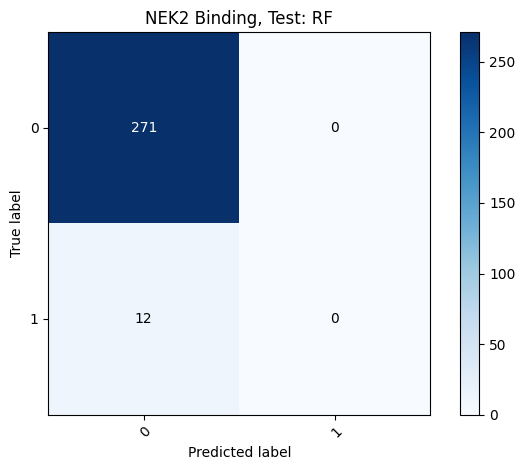

In [11]:
# model1, train_pred, test_pred, train_acc, test_acc, train_prob, test_prob = 
classes = ['0','1']
results1 = rf_models(train_x, train_y, test_x, test_y, 'basic RF', {}, 'binding')
# plot_confusion_matrix(train_y, results1['train_pred'], classes, title=f"NEK2 Bind, Train: RF")
plot_confusion_matrix(test_y, results1['test_pred'], classes, title=f"NEK2 Binding, Test: RF")

In [13]:
fn = (test_y == 1) & (results1['test_pred'] == 0)
results1_fn = test_x[fn]
fn_indicies = np.where(fn)
fn_indicies

(array([271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282]),)

# SMOTE
some improvement, lots 

In [14]:
nek2jp_path = '../../../../data/nek2_featuresplits_jaycee/'
train_x_df_temp = pd.read_csv(nek2jp_path+'NEK2_bind_random_fold1_trainX.csv')
train_y_df_temp = pd.read_csv(nek2jp_path+'NEK2_bind_random_fold1_trainY.csv')
test_x_df_temp = pd.read_csv(nek2jp_path+'NEK2_bind_random_fold1_testX.csv')
test_y_df_temp = pd.read_csv(nek2jp_path+'NEK2_bind_random_fold1_testY.csv')

In [15]:
oversample = SMOTE()
new_train_x_df, new_train_y_df = oversample.fit_resample(train_x_df_temp, train_y_df_temp)
train_xSMOTE=new_train_x_df.to_numpy()
train_ySMOTE = new_train_y_df.to_numpy().reshape(-1)
test_x = test_x_df_temp.to_numpy()
test_y = test_y_df_temp.to_numpy().reshape(-1)

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, sensitivity: 1.000, specificity: 1.000
TEST: accuracy: 0.968, precision: 0.800, recall: 0.333, sensitivity: 1.000, specificity: 1.000


(array([271, 274, 275, 277, 279, 280, 281, 282]),)

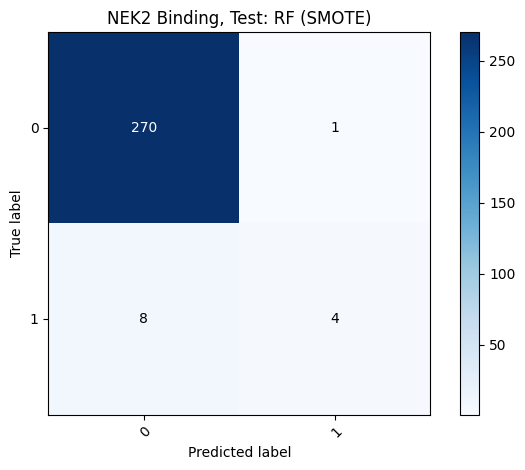

In [16]:
resultsSMOTE = rf_models(train_xSMOTE, train_ySMOTE, test_x, test_y, 'basic RF', {}, 'binding')
# plot_confusion_matrix(train_ySMOTE , resultsSMOTE['train_pred'], classes, title=f"NEK2 Bind, Train: RF (SMOTE)")
plot_confusion_matrix(test_y  , resultsSMOTE['test_pred'], classes, title=f"NEK2 Binding, Test: RF (SMOTE)")

fn = (test_y == 1) & (resultsSMOTE['test_pred'] == 0)
resultsSMOTE_fn = test_x[fn]
fn_indicies = np.where(fn)
fn_indicies

# Normalizing
just predicts 0/ mostly predicts 0

In [17]:
smile_prop_df = pd.read_csv('../../../../data/datasets/NEK_data_4Berkeley/NEK2/NEK2_1_uM_min_50_pct_binding_5fold_random_imbalanced.csv')

smile_prop_train = smile_prop_df[smile_prop_df['fold'] != 'fold1'].drop(columns=['fold'])
smile_prop_test = smile_prop_df[smile_prop_df['fold'] == 'fold1'].drop(columns=['fold'])
mol_train = []
for i in smile_prop_train.index:
    m = Chem.MolFromSmiles(smile_prop_train.loc[i, 'base_rdkit_smiles'])
    if m:
        m.SetProp("_Name", smile_prop_train.loc[i, 'compound_id'])
        m.SetProp("Active", str(smile_prop_train.loc[i, 'active']))
        mol_train.append(utils.normalize(m))

mol_test = []
for i in smile_prop_test.index:
    m = Chem.MolFromSmiles(smile_prop_test.loc[i, 'base_rdkit_smiles'])
    if m:
        m.SetProp("_Name", smile_prop_test.loc[i, 'compound_id'])
        m.SetProp("Active", str(smile_prop_test.loc[i, 'active']))
        mol_test.append(utils.normalize(m))
X_existing_train = smile_prop_train.drop(columns=['compound_id', 'base_rdkit_smiles', 'active'])
X_existing_test = smile_prop_test.drop(columns=['compound_id', 'base_rdkit_smiles', 'active'])
y_train = smile_prop_train['active']
y_test = smile_prop_test['active']


# generate fingeprints: Morgan fingerprint with radius 2
fps = [Chem.AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in mol_train]
# convert the RDKit explicit vectors into numpy arrays
X_morgan_train = []
for fp in fps:
  arr = np.zeros((1,))
  Chem.DataStructs.ConvertToNumpyArray(fp, arr)
  X_morgan_train.append(arr)

# generate fingeprints: Morgan fingerprint with radius 2
fps = [Chem.AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in mol_test]
# convert the RDKit explicit vectors into numpy arrays
X_morgan_test = []
for fp in fps:
  arr = np.zeros((1,))
  Chem.DataStructs.ConvertToNumpyArray(fp, arr)
  X_morgan_test.append(arr)

[13:59:34] Initializing MetalDisconnector
[13:59:34] Running MetalDisconnector
[13:59:34] Initializing Normalizer
[13:59:34] Running Normalizer
[13:59:34] Running LargestFragmentChooser
[13:59:34] Running Uncharger
[13:59:34] Initializing MetalDisconnector
[13:59:34] Running MetalDisconnector
[13:59:34] Initializing Normalizer
[13:59:34] Running Normalizer
[13:59:34] Initializing MetalDisconnector
[13:59:34] Running MetalDisconnector
[13:59:34] Initializing Normalizer
[13:59:34] Running Normalizer
[13:59:34] Running LargestFragmentChooser
[13:59:34] Running Uncharger
[13:59:34] Initializing MetalDisconnector
[13:59:34] Running MetalDisconnector
[13:59:34] Initializing Normalizer
[13:59:34] Running Normalizer
[13:59:34] Initializing MetalDisconnector
[13:59:34] Running MetalDisconnector
[13:59:34] Initializing Normalizer
[13:59:34] Running Normalizer
[13:59:34] Running LargestFragmentChooser
[13:59:34] Running Uncharger
[13:59:34] Initializing MetalDisconnector
[13:59:34] Running MetalD

TRAIN: accuracy: 0.999, precision: 1.000, recall: 0.978, sensitivity: 0.978, specificity: 1.000
TEST: accuracy: 0.961, precision: 1.000, recall: 0.083, sensitivity: 0.978, specificity: 1.000


(array([271, 272, 273, 274, 275, 276, 277, 279, 280, 281, 282]),)

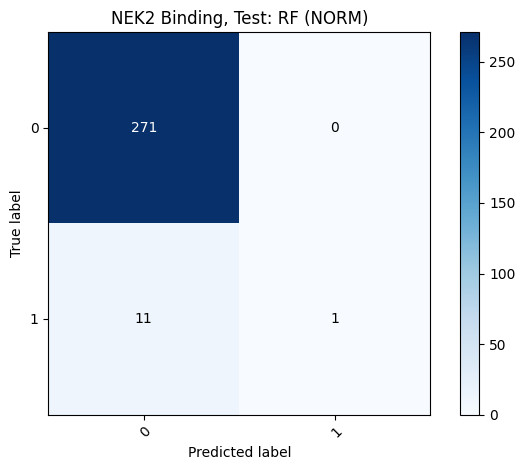

In [18]:

trainX_norm = X_existing_train.to_numpy()
y_train = y_train.to_numpy().reshape(-1)
testX_norm = X_existing_test.to_numpy()
y_test = y_test.to_numpy().reshape(-1)

results_norm = rf_models(trainX_norm, y_train,testX_norm, test_y, 'basic RF', {}, 'binding')
# plot_confusion_matrix(y_train, results_norm['train_pred'], classes, title=f"NEK2 Bind, Train: RF (NORM)")
plot_confusion_matrix(y_test, results_norm['test_pred'], classes, title=f"NEK2 Binding, Test: RF (NORM)")

fn = (y_test == 1) & (results_norm['test_pred'] == 0)
resultsSMOTE_fn = testX_norm[fn]
fn_indicies = np.where(fn)
fn_indicies

# SMOTE with pka+taut norm 
slightly better

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, sensitivity: 1.000, specificity: 1.000
TEST: accuracy: 0.972, precision: 1.000, recall: 0.333, sensitivity: 1.000, specificity: 1.000


(array([271, 274, 275, 277, 279, 280, 281, 282]),)

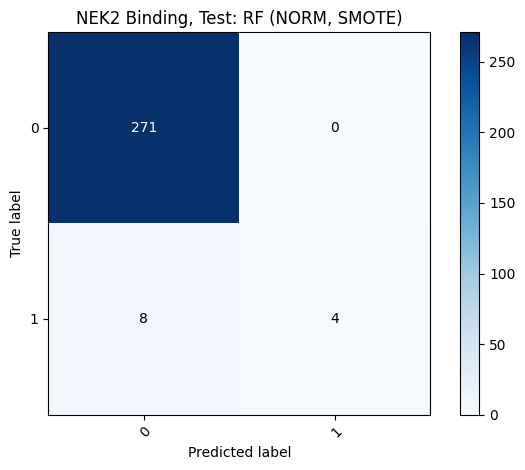

In [19]:
# SMOTE that ^ 
oversample = SMOTE()
trainX_normSMOTE_temp, trainy_normSMOTE_temp = oversample.fit_resample(X_existing_train, smile_prop_train['active'])
trainX_normSMOTE = trainX_normSMOTE_temp.to_numpy()
trainy_normSMOTE = trainy_normSMOTE_temp.to_numpy().reshape(-1)

results_normSMOTE = rf_models(trainX_normSMOTE, trainy_normSMOTE,testX_norm , y_test, 'basic RF', {}, 'binding')

# plot_confusion_matrix(trainy_normSMOTE, results_normSMOTE['train_pred'], classes, title=f"NEK2 Bind, Train: RF (NORM, SMOTE)")
plot_confusion_matrix(y_test, results_normSMOTE['test_pred'], classes, title=f"NEK2 Binding, Test: RF (NORM, SMOTE)")
fn_normSMOTE = (y_test == 1) & (results_normSMOTE['test_pred'] == 0)
results_fnnormSMOTE_fn = testX_norm[fn_normSMOTE]
fn_indicies_normSMOTE = np.where(fn_normSMOTE)
fn_indicies_normSMOTE

# Morgan fingerprints wiht radius 2 
use deepchem to get bit vectors radius 2 
not as good as norm with smote
mainly predicting 0

TRAIN: accuracy: 0.999, precision: 1.000, recall: 0.978, sensitivity: 0.978, specificity: 1.000
TEST: accuracy: 0.968, precision: 1.000, recall: 0.250, sensitivity: 0.978, specificity: 1.000


(array([271, 274, 275, 276, 277, 279, 280, 281, 282]),)

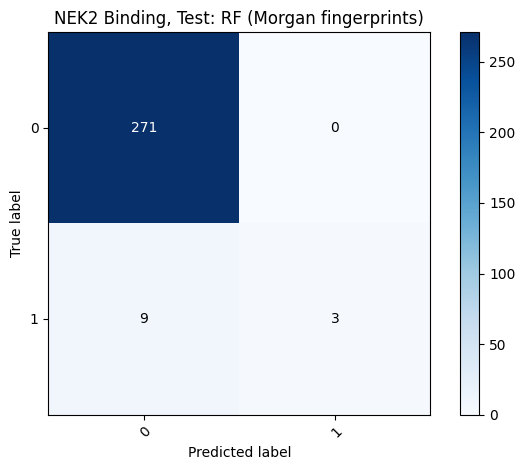

In [20]:

# X_morgan_train = X_morgan_train.to_numpy()
# y_train = y_train.to_numpy().reshape(-1)
# X_morgan_test = X_morgan_test.to_numpy()
# y_test = y_test.to_numpy().reshape(-1)

results_morgan = rf_models(X_morgan_train, y_train,X_morgan_test , y_test, 'basic RF', {}, 'binding')
# plot_confusion_matrix(y_train, results_morgan['train_pred'], classes, title=f"NEK2 Bind, Train: RF (Morgan fingerprints)")
plot_confusion_matrix(y_test, results_morgan ['test_pred'], classes, title=f"NEK2 Binding, Test: RF (Morgan fingerprints)")

fn_morgan = (y_test == 1) & (results_morgan['test_pred'] == 0)
results_fnmorgan = testX_norm[fn_morgan]
fn_indicies_morgan = np.where(fn_morgan)
fn_indicies_morgan

# Morgan fingerprints + SMOTE 
worse, 1 less FN, but less accurate

TRAIN: accuracy: 1.000, precision: 0.999, recall: 1.000, sensitivity: 1.000, specificity: 0.999
TEST: accuracy: 0.965, precision: 0.750, recall: 0.250, sensitivity: 1.000, specificity: 0.999


(array([271, 274, 275, 276, 277, 279, 280, 281, 282]),)

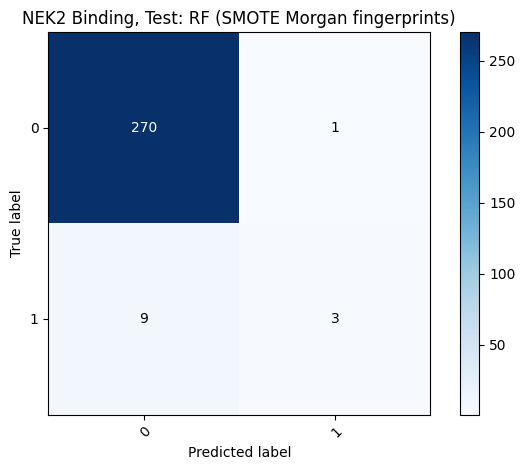

In [21]:
oversample = SMOTE()
trainX_Morgan_temp, trainy_Morgan_temp = oversample.fit_resample(X_morgan_train, y_train)
trainX_Morgan = trainX_Morgan_temp
trainy_Morgan = trainy_Morgan_temp
# len(trainX_Morgan) # 2160 
# y_train.shape # (1125,) 
# trainy_Morgan.shape 

results_morgan_SMOTE = rf_models(trainX_Morgan, trainy_Morgan,X_morgan_test , y_test, 'basic RF', {}, 'binding')
# plot_confusion_matrix(trainy_Morgan, results_morgan_SMOTE['train_pred'], classes, title=f"NEK2 Bind, Train: RF (SMOTE Morgan fingerprints)")
plot_confusion_matrix(y_test, results_morgan_SMOTE['test_pred'], classes, title=f"NEK2 Binding, Test: RF (SMOTE Morgan fingerprints)")

fn_morgan_SMOTE  = (y_test == 1) & (results_morgan_SMOTE['test_pred'] == 0)
results_fnmorgan_SMOTE  = testX_norm[fn_morgan_SMOTE]
fn_indicies_morgan_SMOTE  = np.where(fn_morgan_SMOTE)
fn_indicies_morgan_SMOTE 

# Combine MOE with Morgan fingerprints 
# worse same as original MOE with no smote or antyhing

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, sensitivity: 1.000, specificity: 1.000
TEST: accuracy: 0.965, precision: 1.000, recall: 0.167, sensitivity: 1.000, specificity: 1.000


(array([271, 274, 275, 276, 277, 278, 279, 280, 281, 282]),)

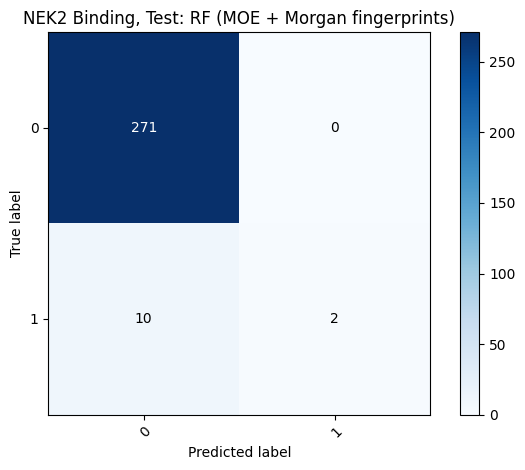

In [22]:
X_train_allfeats = np.hstack((X_existing_train, X_morgan_train))
X_test_allfeats = np.hstack((X_existing_test, X_morgan_test)) # X_test_allfeats.shape (283, 2354) # now 2354 feats 
results_allfeats = rf_models(X_train_allfeats, y_train,X_test_allfeats , y_test, 'basic RF', {}, 'binding')
# plot_confusion_matrix(y_train, results_allfeats['train_pred'], classes, title=f"NEK2 Bind, Train: RF (MOE + Morgan fingerprints)")
plot_confusion_matrix(y_test, results_allfeats['test_pred'], classes, title=f"NEK2 Binding, Test: RF (MOE + Morgan fingerprints)")

fn_allfeats  = (y_test == 1) & (results_allfeats['test_pred'] == 0)
results_fnallfeats  = testX_norm[fn_allfeats]
fn_indicies_allfeats  = np.where(fn_allfeats)
fn_indicies_allfeats

# try combined feats with SMOTE 
less FN
Best so far

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, sensitivity: 1.000, specificity: 1.000
TEST: accuracy: 0.972, precision: 0.833, recall: 0.417, sensitivity: 1.000, specificity: 1.000


(array([271, 274, 275, 277, 279, 280, 281]),)

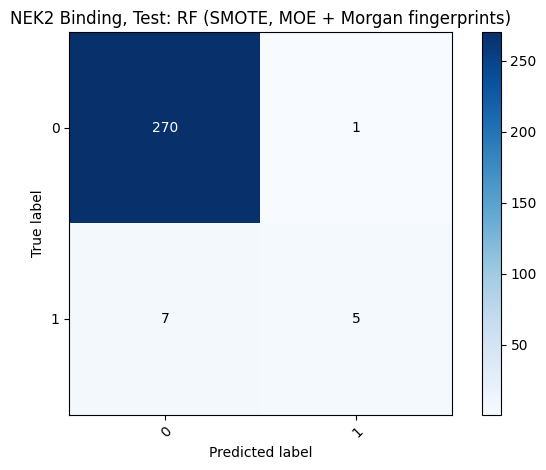

In [23]:
oversample = SMOTE()
trainX_alltemp, trainy_alltemp = oversample.fit_resample(X_train_allfeats, y_train)
results_all_SMOTE = rf_models(trainX_alltemp, trainy_alltemp,X_test_allfeats , y_test, 'basic RF', {}, 'binding')
# plot_confusion_matrix(trainy_alltemp, results_all_SMOTE['train_pred'], classes, title=f"NEK2 Bind, Train: RF (SMOTE, MOE + Morgan fingerprints)")
plot_confusion_matrix(y_test, results_all_SMOTE['test_pred'], classes, title=f"NEK2 Binding, Test: RF (SMOTE, MOE + Morgan fingerprints)")
fn_allfeatsSMOTE  = (y_test == 1) & (results_all_SMOTE['test_pred'] == 0)
results_fnallfeatsSMOTE  = X_test_allfeats[fn_allfeatsSMOTE]
fn_indicies_allfeatsSMOTE  = np.where(fn_allfeatsSMOTE)
fn_indicies_allfeatsSMOTE

# Undersample majority class 
Least FN 
better than MOE feats and using BalancedRandomForest

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, sensitivity: 1.000, specificity: 1.000
TEST: accuracy: 0.717, precision: 0.095, recall: 0.667, sensitivity: 1.000, specificity: 1.000


(array([274, 275, 279, 280]),)

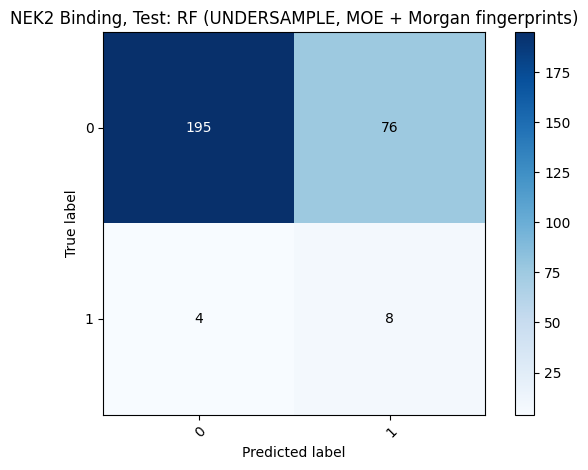

In [44]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
trainX_alltemp_UNDER, trainy_alltemp_UNDER = undersampler.fit_resample(X_train_allfeats, y_train)
results_all_UNDER = rf_models(trainX_alltemp_UNDER, trainy_alltemp_UNDER, X_test_allfeats, y_test, 'basic RF', {}, 'binding')

# plot_confusion_matrix(trainy_alltemp_UNDER, results_all_UNDER['train_pred'], classes, title=f"NEK2 Bind, Train: RF (UNDERSAMPLE, MOE + Morgan fingerprints)")
plot_confusion_matrix(y_test, results_all_UNDER['test_pred'], classes, title=f"NEK2 Binding, Test: RF (UNDERSAMPLE, MOE + Morgan fingerprints)")
fn_allfeatsUNDER  = (y_test == 1) & (results_all_UNDER['test_pred'] == 0)
results_fnallfeatsUNDER  = X_test_allfeats[fn_allfeatsUNDER]
fn_indicies_allfeatsUNDER  = np.where(fn_allfeatsUNDER)
fn_indicies_allfeatsUNDER

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, sensitivity: 1.000, specificity: 1.000
TEST: accuracy: 0.972, precision: 1.000, recall: 0.333, sensitivity: 1.000, specificity: 1.000


(array([271, 274, 275, 277, 278, 279, 280, 281]),)

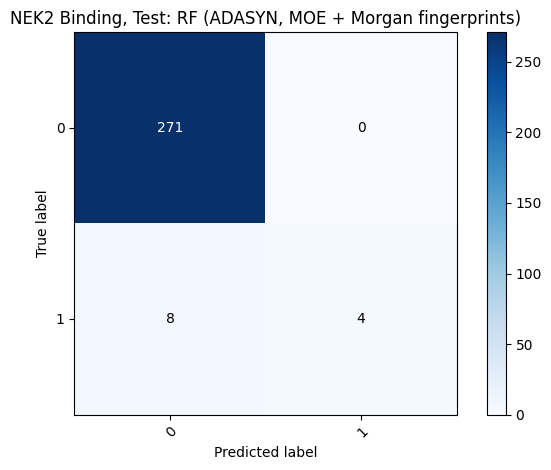

In [50]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_train_ADASYN, trainy_alltemp_ADASYN = adasyn.fit_resample(X_train_allfeats, y_train.to_numpy().reshape(-1))

results_all_ADASYN = rf_models(X_train_ADASYN, trainy_alltemp_ADASYN, X_test_allfeats, y_test, 'basic RF', {}, 'binding')
classes = ['0','1']
# plot_confusion_matrix(trainy_alltemp_ADASYN, results_all_ADASYN['train_pred'], classes, title=f"NEK2 Bind, Train: RF (ADASYN, MOE + Morgan fingerprints)")
plot_confusion_matrix(y_test, results_all_ADASYN['test_pred'], classes, title=f"NEK2 Binding, Test: RF (ADASYN, MOE + Morgan fingerprints)")
fn_allfeatsADASYN  = (y_test == 1) & (results_all_ADASYN['test_pred'] == 0)
results_fnallfeatsADASYN  = X_test_allfeats[fn_allfeatsADASYN ]
fn_indicies_allfeatsADASYN  = np.where(fn_allfeatsADASYN )
fn_indicies_allfeatsADASYN

# Reload data and start again with MOE 

In [24]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [38]:
smile_prop_df_fresh = pd.read_csv('../../../../data/datasets/NEK_data_4Berkeley/NEK2/NEK2_1_uM_min_50_pct_binding_5fold_random_imbalanced.csv')

smile_prop_train_fresh = smile_prop_df_fresh[smile_prop_df_fresh['fold'] != 'fold1'].drop(columns=['fold'])
smile_prop_test_fresh = smile_prop_df_fresh[smile_prop_df_fresh['fold'] == 'fold1'].drop(columns=['fold'])

mol_train = []
for i in smile_prop_train_fresh.index:
    m = Chem.MolFromSmiles(smile_prop_train_fresh.loc[i, 'base_rdkit_smiles'])
    if m:
        m.SetProp("_Name", smile_prop_train_fresh.loc[i, 'compound_id'])
        m.SetProp("Active", str(smile_prop_train_fresh.loc[i, 'active']))
        mol_train.append(utils.normalize(m))

mol_test = []
for i in smile_prop_test_fresh.index:
    m = Chem.MolFromSmiles(smile_prop_test_fresh.loc[i, 'base_rdkit_smiles'])
    if m:
        m.SetProp("_Name", smile_prop_test_fresh.loc[i, 'compound_id'])
        m.SetProp("Active", str(smile_prop_test_fresh.loc[i, 'active']))
        mol_test.append(utils.normalize(m))

X_existing_train = smile_prop_train_fresh.drop(columns=['compound_id', 'base_rdkit_smiles', 'active'])
X_existing_test = smile_prop_test_fresh.drop(columns=['compound_id', 'base_rdkit_smiles', 'active'])
y_train = smile_prop_train_fresh['active']
y_test = smile_prop_test_fresh['active']

# generate fingeprints: Morgan fingerprint with radius 2
fps = [Chem.AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in mol_train]
# convert the RDKit explicit vectors into numpy arrays
X_morgan_train = []
for fp in fps:
  arr = np.zeros((1,))
  Chem.DataStructs.ConvertToNumpyArray(fp, arr)
  X_morgan_train.append(arr)

# generate fingeprints: Morgan fingerprint with radius 2
fps = [Chem.AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in mol_test]
# convert the RDKit explicit vectors into numpy arrays
X_morgan_test = []
for fp in fps:
  arr = np.zeros((1,))
  Chem.DataStructs.ConvertToNumpyArray(fp, arr)
  X_morgan_test.append(arr)


[14:05:30] Initializing MetalDisconnector
[14:05:30] Running MetalDisconnector
[14:05:30] Initializing Normalizer
[14:05:30] Running Normalizer
[14:05:30] Running LargestFragmentChooser
[14:05:30] Running Uncharger
[14:05:30] Initializing MetalDisconnector
[14:05:30] Running MetalDisconnector
[14:05:30] Initializing Normalizer
[14:05:30] Running Normalizer
[14:05:30] Initializing MetalDisconnector
[14:05:30] Running MetalDisconnector
[14:05:30] Initializing Normalizer
[14:05:30] Running Normalizer
[14:05:30] Running LargestFragmentChooser
[14:05:30] Running Uncharger
[14:05:30] Initializing MetalDisconnector
[14:05:30] Running MetalDisconnector
[14:05:30] Initializing Normalizer
[14:05:30] Running Normalizer
[14:05:30] Initializing MetalDisconnector
[14:05:30] Running MetalDisconnector
[14:05:30] Initializing Normalizer
[14:05:30] Running Normalizer
[14:05:30] Running LargestFragmentChooser
[14:05:30] Running Uncharger
[14:05:30] Initializing MetalDisconnector
[14:05:30] Running MetalD

In [42]:
# rdkit descriptors 
desc_names = [desc[0] for desc in Descriptors.descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_names)
descriptors_train = [calc.CalcDescriptors(m) for m in mol_train]

descriptors_test = [calc.CalcDescriptors(m) for m in mol_test]


smile_prop_train_descriptors = pd.concat([smile_prop_train_fresh.reset_index(drop=True), 
                                               pd.DataFrame(X_morgan_train, columns=[f'Morgan_{i}' for i in range(len(X_morgan_train))]),
                                               pd.DataFrame(descriptors_train, columns=desc_names)], 
                                              axis=1)


smile_prop_test_descriptors = pd.concat([smile_prop_test.reset_index(drop=True), 
                                              pd.DataFrame(X_morgan_test, columns=[f'Morgan_{i}' for i in range(len(X_morgan_test))]),
                                              pd.DataFrame(descriptors_test, columns=desc_names)], 
                                             axis=1)

ValueError: 1125 columns passed, passed data had 2048 columns